In [2]:
cd C:\Users\anime\OneDrive\Desktop\Song Popularity Prediction

C:\Users\anime\OneDrive\Desktop\Song Popularity Prediction


In [3]:
import pandas as pd

In [4]:
!pip install pandas_profiling

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.head(15)

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0
5,5,188891.0,0.035655,0.825919,0.804528,-0.000005,4.0,0.120758,-6.122926,0,0.039012,115.679128,4,0.709408,0
6,6,161061.0,0.081743,0.673588,0.880181,0.000327,0.0,0.535411,-2.909607,1,0.030902,98.046205,4,0.982729,0
7,7,196202.0,0.259747,0.813214,0.554385,0.000390,8.0,0.276580,-7.794237,0,0.207067,158.626764,3,0.662987,1
8,8,169660.0,NaN,0.653263,0.917034,0.001748,0.0,NaN,-4.422089,0,0.031608,122.382398,3,0.297683,1
9,9,167245.0,0.019617,0.595235,0.820039,0.761884,5.0,0.181098,-5.154293,0,0.054493,110.524824,4,0.535453,0


In [7]:
df.count()

id                  40000
song_duration_ms    35899
acousticness        36008
danceability        35974
energy              36025
instrumentalness    36015
key                 35935
liveness            35914
loudness            36043
audio_mode          40000
speechiness         40000
tempo               40000
time_signature      40000
audio_valence       40000
song_popularity     40000
dtype: int64

In [8]:
df.isna().sum()

id                     0
song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

In [9]:
# from pandas_profiling import ProfileReport

In [10]:
# profile = ProfileReport(df, title = 'Song Pop Report', explorative = True)

In [11]:
# profile.to_widgets()

In [12]:
# df.dtypes

In [13]:
df['song_duration_ms'].fillna(df['song_duration_ms'].mean(), inplace = True)

In [14]:
df.isnull().sum()

id                     0
song_duration_ms       0
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

In [15]:
df['acousticness'].fillna(df['acousticness'].mean(), inplace = True)
df['danceability'].fillna(df['danceability'].mean(), inplace = True)
df['energy'].fillna(df['energy'].mean(), inplace = True)
df['instrumentalness'].fillna(df['instrumentalness'].mean(), inplace = True)
df['key'].fillna(df['key'].mean(), inplace = True)
df['liveness'].fillna(df['liveness'].mean(), inplace = True)
df['loudness'].fillna(df['loudness'].mean(), inplace = True)

In [16]:
df.isnull().sum()

id                  0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
song_popularity     0
dtype: int64

# Visualisation

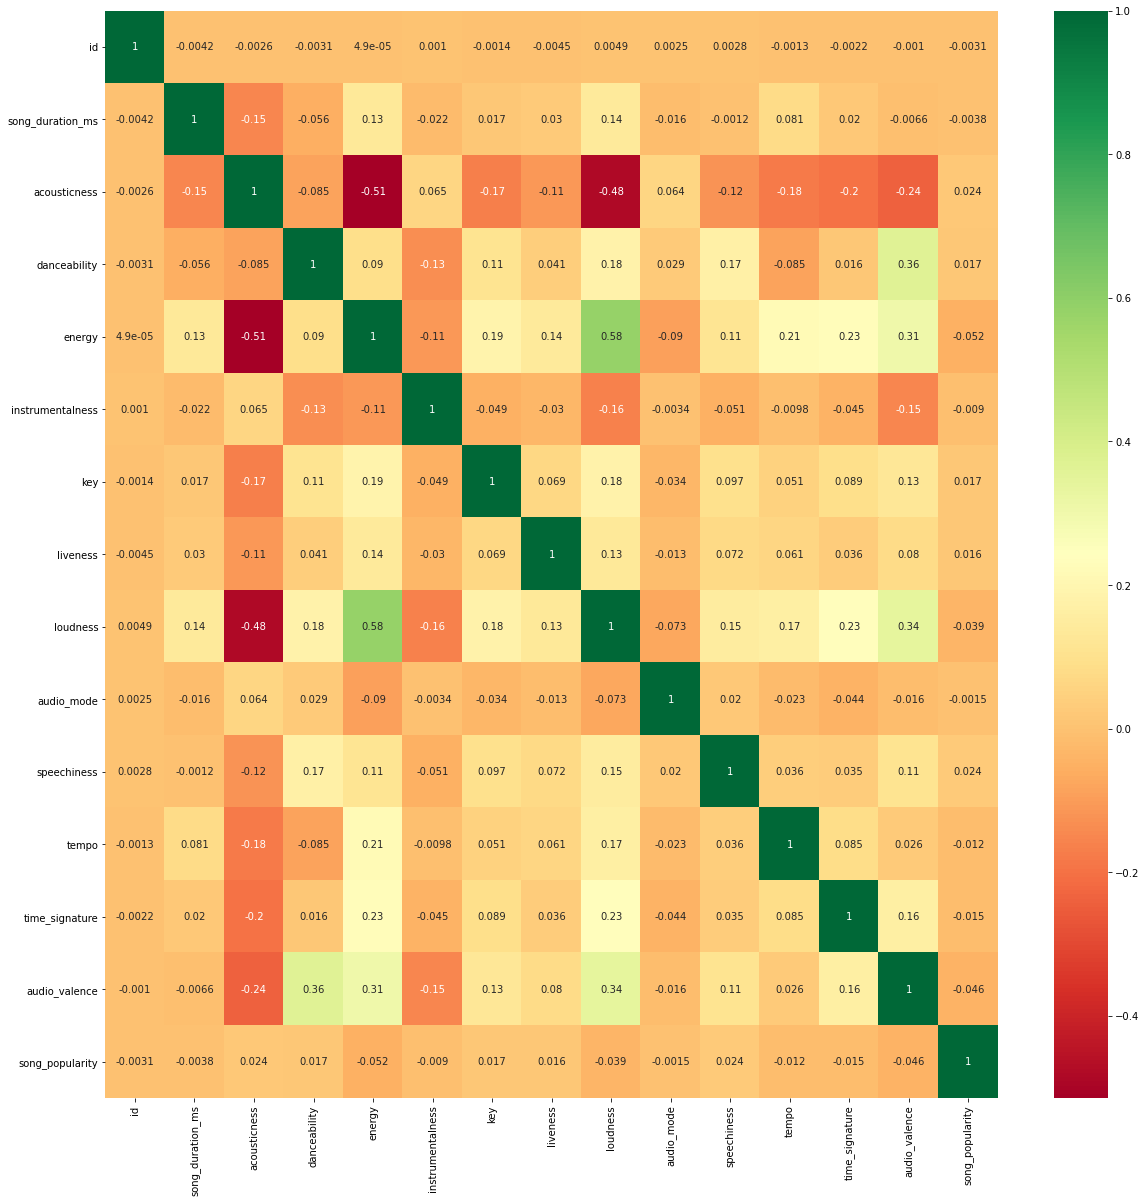

In [17]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# XGB

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [471]:
X = df.drop(columns = ['id', 'song_popularity', 'song_duration_ms', 'instrumentalness'])
y = df.song_popularity

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [473]:
xgbc = XGBClassifier()

In [474]:
print(xgbc)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [475]:
xgbc.fit(X_train, y_train)

[19:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [476]:
y_pred = xgbc.predict(X_test)
predictions = [round(value) for value in y_pred]

In [477]:
from sklearn.metrics import accuracy_score

In [478]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.90%


# XGB with HT

In [491]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [492]:
X = df.drop(columns = ['id', 'song_popularity', 'song_duration_ms', 'instrumentalness', 'audio_mode'])
y = df.song_popularity

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [494]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    
}

In [495]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [496]:
xgbc = XGBClassifier()

In [497]:
random_search=RandomizedSearchCV(xgbc,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [498]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   14.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.5s finished
C:\Users\anime\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [499]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [500]:
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=0, missing=1, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [501]:
xgbc.fit(X_train, y_train)

[19:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=0, missing=1, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [502]:
y_pred = xgbc.predict(X_test)
predictions = [round(value) for value in y_pred]

In [503]:
from sklearn.metrics import accuracy_score

In [504]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.64525


In [505]:
df1 = pd.read_csv("test.csv")

In [508]:
df1['song_duration_ms'].fillna(df['song_duration_ms'].mean(), inplace = True)
df1['acousticness'].fillna(df1['acousticness'].mean(), inplace = True)
df1['danceability'].fillna(df1['danceability'].mean(), inplace = True)
df1['energy'].fillna(df1['energy'].mean(), inplace = True)
df1['instrumentalness'].fillna(df1['instrumentalness'].mean(), inplace = True)
df1['key'].fillna(df['key'].mean(), inplace = True)
df1['liveness'].fillna(df1['liveness'].mean(), inplace = True)
df1['loudness'].fillna(df1['loudness'].mean(), inplace = True)

In [512]:
X1 = df1.drop(columns = ['id', 'song_duration_ms', 'instrumentalness', 'audio_mode'])

In [513]:
X1.isnull().sum()

acousticness      0
danceability      0
energy            0
key               0
liveness          0
loudness          0
speechiness       0
tempo             0
time_signature    0
audio_valence     0
dtype: int64

In [514]:
y1 = xgbc.predict(X1)

In [515]:
y1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [518]:
df_final = pd.DataFrame({'song_popularity': y1})
df_final1 = df1.id

In [519]:
result = pd.concat([df_final1, df_final], axis=1, ignore_index=True)

In [520]:
result.head()

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [522]:
result.columns = ['id', 'song_popularity']

In [523]:
result.head()

,id,song_popularity
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [525]:
result.to_csv('submission.csv')

# Saving Predictions

In [75]:
df1 = pd.read_csv("test.csv")

In [76]:
df1['song_duration_ms'].fillna(df['song_duration_ms'].mean(), inplace = True)
df1['acousticness'].fillna(df1['acousticness'].mean(), inplace = True)
df1['danceability'].fillna(df1['danceability'].mean(), inplace = True)
df1['energy'].fillna(df1['energy'].mean(), inplace = True)
df1['instrumentalness'].fillna(df1['instrumentalness'].mean(), inplace = True)
df1['key'].fillna(df['key'].mean(), inplace = True)
df1['liveness'].fillna(df1['liveness'].mean(), inplace = True)
df1['loudness'].fillna(df1['loudness'].mean(), inplace = True)

In [77]:
X1 = df1.drop(columns = ['id'])

In [78]:
X1.isnull().sum()

song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [79]:
X1.isnull().sum()

song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [80]:
X1.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,308523.000000,0.019845,0.569817,0.908939,0.001438,5.042605,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,200011.000000,0.070119,0.731256,0.444655,0.002020,10.000000,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424
2,279758.000000,0.810637,0.568858,0.125466,0.898841,0.000000,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951
3,249197.000000,0.280280,0.871789,0.557342,0.000715,4.000000,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485
4,193165.847572,0.765568,0.624687,0.710794,0.000346,8.000000,0.308284,-7.422145,0,0.129284,88.703121,3,0.935571


In [81]:
y1 = xgbc.predict(X1)

In [86]:
y1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [87]:
df_final = pd.DataFrame({'song_popularity': y1})
df_final1 = df1.id

In [88]:
result = pd.concat([df_final1, df_final], axis=1, ignore_index=True)

In [89]:
result.head()

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [96]:
df2 = result.rename({'0': 'id', '1': 'song_popularity'}, axis=1)

In [99]:
df2.columns = ['id', 'song_popularity']

In [100]:
df2.head()

,id,song_popularity
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [101]:
df2.to_csv('submission.csv')

# DTC

In [102]:
from sklearn import tree

In [103]:
model = tree.DecisionTreeClassifier()

In [104]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
model.score(X_test, y_test)

0.5445

# SGD

In [106]:
from sklearn.linear_model import SGDClassifier

In [107]:
sgd = SGDClassifier()

In [108]:
sgd.fit(X_train, y_train)

SGDClassifier()

In [109]:
sgd.score(X_test, y_test)

0.36075

# Linear SVC

In [126]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [127]:
lsvc = LinearSVC(verbose=0)

In [128]:
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)

C:\Users\anime\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# K Neighbours 

In [129]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [130]:
y_pred = classifier.predict(X_test)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[2245  312]
 [1260  183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74      2557
           1       0.37      0.13      0.19      1443

    accuracy                           0.61      4000
   macro avg       0.51      0.50      0.46      4000
weighted avg       0.54      0.61      0.54      4000

Accuracy: 0.607
